<a href="https://colab.research.google.com/github/nehamjain10/Options_Pricing/blob/main/Data_Cleaning_%2B_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
from google.colab import drive
#drive.flush_and_unmount()
drive.mount('/content/drive/')

Mounted at /content/drive/


In [72]:
df=pd.read_csv("/content/drive/MyDrive/DL materials/Options Pricing/final_data_interest_rate.csv")

In [73]:
columns=["Option Type", "Strike Price" "Close", "Underlying", "Durartion", "Rate"]

In [74]:
df.head()

,Unnamed: 0,Date,Symbol,Expiry,Option Type,Strike Price,Open,High,Low,Close,Last,Settle Price,Number of Contracts,Turnover,Premium Turnover,Open Interest,Change in OI,Underlying,DateOfTrade,Duration,R1,R2,rate
0,0,2010-01-04,NIFTY,2010-03-25,CE,2400.0,2799.00,2820.0,2780.00,2820.00,2820.0,2820.00,5,1.298000e+06,NaN,30550,100,5232.2,2010-01-04,80,3.35,4.959,3.291491
1,1,2010-01-04,NIFTY,2010-03-25,CE,5800.0,45.05,50.5,45.05,47.80,50.0,47.80,3544,1.036386e+09,NaN,179450,160750,5232.2,2010-01-04,80,3.35,4.959,3.291491
2,2,2010-01-04,NIFTY,2010-03-25,CE,2600.0,0.00,0.0,0.00,866.70,0.0,2657.80,0,0.000000e+00,NaN,0,0,5232.2,2010-01-04,80,3.35,4.959,3.291491
3,3,2010-01-04,NIFTY,2010-03-25,CE,2700.0,0.00,0.0,0.00,808.15,0.0,2558.80,0,0.000000e+00,NaN,0,0,5232.2,2010-01-04,80,3.35,4.959,3.291491
4,4,2010-01-04,NIFTY,2010-03-25,CE,2800.0,0.00,0.0,0.00,752.70,0.0,2459.75,0,0.000000e+00,NaN,0,0,5232.2,2010-01-04,80,3.35,4.959,3.291491


In [75]:
df.shape

(1138013, 23)

In [76]:
underlying = pd.read_csv("/content/drive/MyDrive/DL materials/Options Pricing/underlying.csv")

In [77]:
underlying["Date"] = underlying["0"]

In [78]:
col1 = ["Close", "Date"]

In [79]:
underlying = underlying[col1]

In [80]:
underlying.shape

(1244, 2)

In [81]:
underlying['sigma_20'] = underlying.Close.rolling(20).apply(lambda x: (np.diff(x) / x[:-1]).std())

In [82]:
underlying["Close"]

0       5232.20
1       5277.90
2       5281.80
3       5263.10
4       5244.75
         ...   
1239    8174.10
1240    8200.70
1241    8246.30
1242    8248.25
1243    8282.70
Name: Close, Length: 1244, dtype: float64

In [83]:
import matplotlib.pyplot as plt

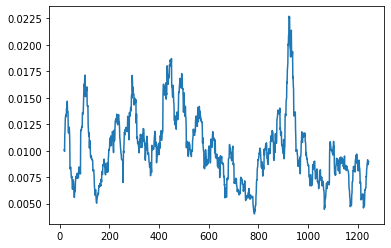

In [84]:
plt.plot(underlying.sigma_20)

In [85]:
joined = df.merge(underlying, on = "Date")

In [86]:
joined.shape

(355468, 25)

In [87]:
joined.columns

Index(['Unnamed: 0', 'Date', 'Symbol', 'Expiry', 'Option Type', 'Strike Price',
       'Open', 'High', 'Low', 'Close_x', 'Last', 'Settle Price',
       'Number of Contracts', 'Turnover', 'Premium Turnover', 'Open Interest',
       'Change in OI', 'Underlying', 'DateOfTrade', 'Duration', 'R1', 'R2',
       'rate', 'Close_y', 'sigma_20'],
      dtype='object')

In [88]:
col2 = joined.columns

In [89]:
final = joined[col2]

In [90]:
final.head()

,Unnamed: 0,Date,Symbol,Expiry,Option Type,Strike Price,Open,High,Low,Close_x,Last,Settle Price,Number of Contracts,Turnover,Premium Turnover,Open Interest,Change in OI,Underlying,DateOfTrade,Duration,R1,R2,rate,Close_y,sigma_20
0,0,2010-01-04,NIFTY,2010-03-25,CE,2400.0,2799.00,2820.0,2780.00,2820.00,2820.0,2820.00,5,1.298000e+06,NaN,30550,100,5232.2,2010-01-04,80,3.35,4.959,3.291491,5232.2,NaN
1,1,2010-01-04,NIFTY,2010-03-25,CE,5800.0,45.05,50.5,45.05,47.80,50.0,47.80,3544,1.036386e+09,NaN,179450,160750,5232.2,2010-01-04,80,3.35,4.959,3.291491,5232.2,NaN
2,2,2010-01-04,NIFTY,2010-03-25,CE,2600.0,0.00,0.0,0.00,866.70,0.0,2657.80,0,0.000000e+00,NaN,0,0,5232.2,2010-01-04,80,3.35,4.959,3.291491,5232.2,NaN
3,3,2010-01-04,NIFTY,2010-03-25,CE,2700.0,0.00,0.0,0.00,808.15,0.0,2558.80,0,0.000000e+00,NaN,0,0,5232.2,2010-01-04,80,3.35,4.959,3.291491,5232.2,NaN
4,4,2010-01-04,NIFTY,2010-03-25,CE,2800.0,0.00,0.0,0.00,752.70,0.0,2459.75,0,0.000000e+00,NaN,0,0,5232.2,2010-01-04,80,3.35,4.959,3.291491,5232.2,NaN


In [91]:
final.shape

(355468, 25)

In [92]:
final = final[final["Turnover"]>0]

In [93]:
final.shape

(105625, 25)

In [94]:
from scipy.stats import norm

In [95]:
def black_scholes(row):
    S = row.Underlying
    X = row["Strike Price"]
    T = row.Duration / 365
    r = row.rate / 100
    σ = row.sigma_20
    d1 = (np.log(S / X) + (r + (σ ** 2) / 2) * T) / (σ * (T ** .5))
    d2 = d1 - σ * (T ** .5)
    C = S * norm.cdf(d1) - X * np.exp(-r * T) * norm.cdf(d2)
    return C

In [96]:
final['black_scholes_pred'] = final.apply(black_scholes, axis=1)

In [97]:
final["diff"] = final["Close_x"] - final["black_scholes_pred"]

In [98]:
final["diff"].describe()

count    104218.000000
mean         33.446151
std          73.694852
min        -740.981032
25%           0.250000
50%          11.212844
75%          61.848096
max         684.811051
Name: diff, dtype: float64

In [99]:
col3=["Date","Close_x","Strike Price", "Underlying", "Duration", "rate", "sigma_20"]

In [100]:
final = final[col3]

In [101]:
final.shape

(105625, 7)

In [102]:
final = final.dropna()

In [103]:
final.shape

(104218, 7)

In [104]:
df = final

In [105]:
df

,Date,Close_x,Strike Price,Underlying,Duration,rate,sigma_20
3254,2010-02-01,38.20,5500.0,4899.7,87,3.991731,0.010098
3255,2010-02-01,195.50,5000.0,4899.7,87,3.991731,0.010098
3256,2010-02-01,144.00,5100.0,4899.7,87,3.991731,0.010098
3257,2010-02-01,103.35,5200.0,4899.7,87,3.991731,0.010098
3258,2010-02-01,78.40,5300.0,4899.7,87,3.991731,0.010098
...,...,...,...,...,...,...,...
355391,2014-12-31,1.90,9200.0,8282.7,29,8.380575,0.008940
355393,2014-12-31,1.40,9300.0,8282.7,29,8.380575,0.008940
355395,2014-12-31,1.50,9400.0,8282.7,29,8.380575,0.008940
355397,2014-12-31,1.25,9500.0,8282.7,29,8.380575,0.008940


In [106]:
df.describe()

,Close_x,Strike Price,Underlying,Duration,rate,sigma_20
count,104218.000000,104218.000000,104218.000000,104218.000000,104218.000000,104218.000000
mean,494.971166,5888.925138,5986.447570,66.045194,8.043771,0.010117
std,753.126084,1261.483108,939.181647,67.793828,1.281389,0.003263
min,0.050000,2000.000000,4544.200000,1.000000,3.489920,0.004026
25%,19.100000,5100.000000,5322.900000,22.000000,7.537738,0.007911
50%,185.425000,5900.000000,5784.250000,44.000000,8.347382,0.009634
75%,656.487500,6600.000000,6200.050000,82.000000,8.674720,0.011740
max,5925.000000,10500.000000,8588.250000,364.000000,12.303742,0.022707


In [107]:
from keras.models import Sequential
from keras.layers import Dense, Activation, LeakyReLU, BatchNormalization
from keras import backend
from keras.callbacks import TensorBoard
from keras.optimizers import Adam
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import roc_auc_score as ras
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [108]:
X_col = ['Strike Price', 'Underlying','Duration', 'rate', 'sigma_20']
y_col = ["Close_x"]

In [109]:
def col_normalize(df, cols = []):
  scaler = StandardScaler()
  for i in cols:
    df[i] = (df[i] - np.mean(df[i]))/np.std(df[i])
  return df

def perform_pca(df_train, df_test, n_components):
  pca = PCA(n_components = n_components, copy = True)
  scaler = StandardScaler()


  df_PC_train = pd.DataFrame(pca.fit_transform(df_train))
  df_PC_train = pd.DataFrame(scaler.fit_transform(df_PC_train))

  df_PC_test = pd.DataFrame(pca.transform(df_test))
  df_PC_test = pd.DataFrame(scaler.fit_transform(df_PC_test))

  return df_PC_train, df_PC_test

In [110]:
X = df[X_col]
y = df[y_col]

In [111]:
y

,Close_x
3254,38.20
3255,195.50
3256,144.00
3257,103.35
3258,78.40
...,...
355391,1.90
355393,1.40
355395,1.50
355397,1.25


In [112]:
X_std = col_normalize(X, X_col)
#y_std = col_normalize(y, y_col)
y_std = y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [113]:
X_std.head()

,Strike Price,Underlying,Duration,rate,sigma_20
3254,-0.308309,-1.157127,0.309098,-3.162241,-0.005822
3255,-0.704670,-1.157127,0.309098,-3.162241,-0.005822
3256,-0.625398,-1.157127,0.309098,-3.162241,-0.005822
3257,-0.546126,-1.157127,0.309098,-3.162241,-0.005822
3258,-0.466854,-1.157127,0.309098,-3.162241,-0.005822


In [114]:
X_std.describe()

,Strike Price,Underlying,Duration,rate,sigma_20
count,1.042180e+05,1.042180e+05,1.042180e+05,1.042180e+05,1.042180e+05
mean,-1.658639e-14,2.626540e-13,1.829572e-14,-2.736347e-13,1.133848e-13
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-3.082835e+00,-1.535650e+00,-9.594606e-01,-3.553858e+00,-1.866804e+00
25%,-6.253979e-01,-7.065201e-01,-6.496964e-01,-3.949120e-01,-6.762785e-01
50%,8.779282e-03,-2.152923e-01,-3.251815e-01,2.369397e-01,-1.480957e-01
75%,5.636843e-01,2.274357e-01,2.353442e-01,4.923967e-01,4.973911e-01
max,3.655298e+00,2.770300e+00,4.395035e+00,3.324511e+00,3.858516e+00


In [115]:
y_std.head()

,Close_x
3254,38.20
3255,195.50
3256,144.00
3257,103.35
3258,78.40


In [116]:
call_X_train, call_X_test, call_y_train, call_y_test = train_test_split(X_std, y_std, test_size=0.1, random_state=42)

In [117]:
call_X_train.describe()

,Strike Price,Underlying,Duration,rate,sigma_20
count,93796.000000,93796.000000,93796.000000,93796.000000,93796.000000
mean,0.000195,0.001036,-0.001316,0.000925,-0.001506
std,1.000225,1.000717,0.996798,0.999468,0.998742
min,-3.082835,-1.535650,-0.959461,-3.553858,-1.866804
25%,-0.625398,-0.706520,-0.649696,-0.390623,-0.676279
50%,0.008779,-0.215292,-0.325182,0.237913,-0.152665
75%,0.563684,0.227436,0.235344,0.492397,0.493411
max,3.655298,2.770300,4.395035,3.324511,3.858516


In [143]:
# Hyperparams
n_units = 400
n_batch = 4096

In [161]:
model = Sequential()
model.add(Dense(n_units, input_dim=call_X_train.shape[1]))
model.add(LeakyReLU())

model.add(Dense(n_units*2))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(Dense(n_units*3/2))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(Dense(n_units))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(Dense(1, activation='relu'))

model.compile(loss='mse', optimizer=Adam())

In [162]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 400)               2400      
_________________________________________________________________
leaky_re_lu_32 (LeakyReLU)   (None, 400)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 800)               320800    
_________________________________________________________________
batch_normalization_23 (Batc (None, 800)               3200      
_________________________________________________________________
leaky_re_lu_33 (LeakyReLU)   (None, 800)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 600)               480600    
_________________________________________________________________
batch_normalization_24 (Batc (None, 600)              

In [163]:
n_epochs = 80
history = model.fit(call_X_train, call_y_train, 
                    batch_size=n_batch, epochs=n_epochs, 
                    validation_split = 0.05,
                    callbacks=[TensorBoard()],
                    verbose=1)

Epoch 1/80
22/22 [==============================] - 9s 385ms/step - loss: 789704.8967 - val_loss: 733007.5000
Epoch 2/80
22/22 [==============================] - 8s 373ms/step - loss: 768315.5516 - val_loss: 727584.1250
Epoch 3/80
22/22 [==============================] - 8s 372ms/step - loss: 756577.5190 - val_loss: 727505.9375
Epoch 4/80
22/22 [==============================] - 8s 372ms/step - loss: 762989.8668 - val_loss: 727174.6875
Epoch 5/80
22/22 [==============================] - 8s 375ms/step - loss: 745880.1848 - val_loss: 724543.1875
Epoch 6/80
22/22 [==============================] - 8s 376ms/step - loss: 736781.3370 - val_loss: 719970.6250
Epoch 7/80
22/22 [==============================] - 8s 371ms/step - loss: 707528.3370 - val_loss: 712075.0000
Epoch 8/80
22/22 [==============================] - 8s 372ms/step - loss: 700219.5462 - val_loss: 701496.5625
Epoch 9/80
22/22 [==============================] - 8s 372ms/step - loss: 689474.7989 - val_loss: 686670.5625
Epoch 10/8

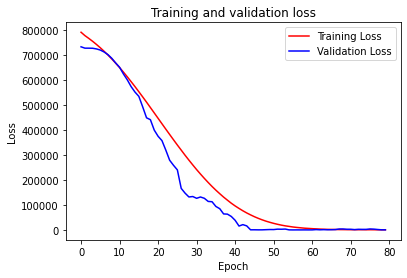

In [164]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [165]:
y_pred = model.predict(call_X_test)

In [167]:
y_pred

array([[1402.6134 ],
       [ 344.47348],
       [3880.7576 ],
       ...,
       [ 898.41595],
       [   0.     ],
       [1664.7218 ]], dtype=float32)

In [168]:
call_y_test

,Close_x
241050,1363.65
24784,332.50
36514,3850.00
35703,865.00
57136,770.00
...,...
66147,830.05
298438,6.50
201147,871.00
173929,1.20


In [166]:
mse(y_pred, call_y_test)

1115.0596541883788

In [ ]:
ras(y_pred, call_y_test)